In [52]:
import pandas as pd
import numpy as np
from LX2_masterscan import mz_ml_paths, spectra_2_df


In [53]:
import pickle
with open('optoins.pkl','rb') as f: options = pickle.load(f)

In [54]:
options['timerange'] = (0,1080)

In [187]:
options

{'setting': 1.0, 'selectionWindow': 0.4, 'MStolerance': 2.00 ppm, 'MSMStolerance': 2.00 ppm, 'MSresolution': 5.00 ppm, 'MSMSresolution': 11.11 ppm, 'MSresolutionDelta': -100.0, 'MSMSresolutionDelta': -90.0, 'MSthreshold': 0.0001, 'MSMSthreshold': 0.0001, 'MSminOccupation': 0.5, 'MSMSminOccupation': 0.5, 'precursorMassShift': 0.0, 'precursorMassShiftOrbi': 0.0, 'optionalMStolerance': 5.00 ppm, 'optionalMSMStolerance': 5.00 ppm, 'MSfilter': 0.6, 'MSMSfilter': 0.6, 'loopNr': 3, 'importMSMS': True, 'pisSpectra': False, 'isotopicCorrection_MSMS': False, 'removeIsotopes': True, 'isotopesInMasterScan': False, 'monoisotopicCorrection': False, 'relativeIntensity': False, 'logMemory': False, 'intensityCorrection': False, 'masterScanInSQL': False, 'sumFattyAcids': False, 'isotopicCorrectionMS': True, 'isotopicCorrectionMSMS': True, 'complementMasterScan': False, 'noHead': False, 'compress': False, 'tabLimited': False, 'dumpMasterScan': False, 'statistics': False, 'noPermutations': True, 'settings

In [55]:
print('here')

here


In [56]:
mzmls = mz_ml_paths(options)
samples = [p.stem for p in mzmls]

In [57]:
spectra_dfs = spectra_2_df(options)


[13:52:14] {ms_deisotope.data_source.scan.loader:376} INFO - Disposing of MzMLLoader('test_resources\\small_test\\190321_Serum_Lipidextract_368723_01.mzML') with 405 extant scans attached to it.


KeyboardInterrupt: 

In [ ]:
for spectra_df in spectra_dfs:
    break

In [77]:
def guess_selection_window (spectra_df):
    precursor_mzs = spectra_df.loc[~spectra_df.precursor_id.isna()].precursor_mz.drop_duplicates()
    precursor_mzs.sort_values(inplace=True)
    agg_data = precursor_mzs.diff().agg(['mean','std'])

    mean_less_std = agg_data.at['mean'] - agg_data.at['std']
    if mean_less_std > 0:
        res =  mean_less_std / 2
    else:
        res =  agg_data.at['mean'] /2

    return res

In [86]:
# suggest tolerance
# sugest calibration masses using suggested tolerance
scan_count = spectra_df.loc[spectra_df.precursor_id.isna()].scan_id.unique().size


60

In [324]:
df = spectra_df.loc[spectra_df.precursor_id.isna()]

In [325]:
df['scan_id_f'] = df['scan_id'].factorize()[0]

c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [330]:
df.sort_values(['mz','scan_id_f'], ascending=False, inplace=True)
df

c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,mz,inty,stem,scan_id,filter_string,precursor_id,precursor_mz,polarity,scan_id_f
3332,999.949280,2012.177612,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=6,FTMS + p NSI Full ms [350.0000-2000.0000],None,0.0,1,5
5438,999.947937,12384.243164,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=7,FTMS + p NSI Full ms [350.0000-2000.0000],None,0.0,1,6
3331,999.796692,407.288666,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=6,FTMS + p NSI Full ms [350.0000-2000.0000],None,0.0,1,5
5437,999.792053,6041.025879,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=7,FTMS + p NSI Full ms [350.0000-2000.0000],None,0.0,1,6
5436,999.644165,12491.394531,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=7,FTMS + p NSI Full ms [350.0000-2000.0000],None,0.0,1,6
...,...,...,...,...,...,...,...,...,...
58,360.150513,675232.000000,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=2959,FTMS + p NSI Full ms [350.0000-1200.0000],None,0.0,1,58
58,360.150421,658542.187500,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=2858,FTMS + p NSI Full ms [350.0000-1200.0000],None,0.0,1,57
62,360.150360,41514.460938,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=2757,FTMS + p NSI Full ms [350.0000-1200.0000],None,0.0,1,56
66,360.150330,52007.574219,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=2656,FTMS + p NSI Full ms [350.0000-1200.0000],None,0.0,1,55


In [336]:
df['nunique_scans'] = df.rolling(60)['scan_id_f'].apply(lambda s:len(set(s)))

c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [337]:
df['nunique_scans'].max()

56.0

In [344]:
df['mean_diff'] = df['mz'].diff(-1).rolling(56).mean()

c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [362]:
df.to_clipboard()

In [366]:
df['mz_r'] = (df.mz / 10).round() *10

valids = df.loc[df['nunique_scans'] >= 56 * 0.9]


c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [367]:
valids['resolution'] = valids['mz'] / valids['mean_diff']

c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [364]:
valids.sort_values('mz', inplace = True)
valids['max_diff'] = valids['mean_diff'].cummax()


c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [368]:
valids.to_clipboard()

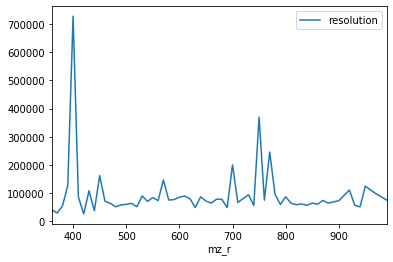

In [371]:
valids.groupby('mz_r')['resolution'].min().to_frame().reset_index().plot(x='mz_r', y="resolution")

In [ ]:
def suggest_resolution_and_gradient(spectra_df):
    df = spectra_df.loc[spectra_df.precursor_id.isna()]
    scan_count = df.scan_id.unique().size

    df['scan_id_f'] = df['scan_id'].factorize()[0]
    df.sort_values(['mz','scan_id_f'], ascending=False, inplace=True)
    df['nunique_scans'] = df.rolling(60)['scan_id_f'].apply(lambda s:len(set(s)))
    max_unique_scans = df['nunique_scans'].max()
    df['mean_diff'] = df['mz'].diff(-1).rolling(max_unique_scans).mean()
    df['mz_r'] = (df.mz / 10).round() *10

    valids = df.loc[df['nunique_scans'] >= max_unique_scans * 0.9]
    valids.sort_values('mz', inplace = True)
    valids['max_diff'] = valids['mean_diff'].cummax()
    selected = valids.groupby('mz_r')['resolution'].min().to_frame().reset_index()
    # selected.plot(x='mz_r', y="resolution")
    res_at_loest_mass = selected['resolution'].iat[0]
    gradient = selected['resolution'].iat[-1] - selected['resolution'].iat[0 ] / selected['mz_r'].iat[-1] - selected['mz_r'].iat[0 ]
    return  res_at_loest_mass, gradient

In [295]:
df['diff'] = df['mz'].diff(-1)
low,high = df['diff'].quantile([.20,.80])

c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [278]:
mzs = spectra_df.loc[spectra_df.precursor_id.isna()].mz.sort_values(ascending= False).to_frame()

In [279]:
mzs['difs'] = mzs['mz'].diff(-1).replace(0,np.nan).fillna(method = 'bfill').fillna(method = 'ffill')

In [280]:
low,high = mzs['difs'].quantile([.20,.80])

In [281]:
mzs.loc[mzs['difs'].between(low,high), 'difs'] = np.nan

In [282]:
mzs['cummin'] = mzs['difs'].cummin() 

In [286]:
mzs.groupby('cummin')['mz'].last()

cummin
0.000031    360.147644
0.001465    511.368652
0.001526    981.797913
0.001587    983.286438
0.001770    998.639404
0.004639    999.642883
0.151245    999.947937
Name: mz, dtype: float32

In [233]:
absolute_tolerences.index.rename('da', inplace=True)
absolute_tolerences.reset_index(inplace=True)
absolute_tolerences['resolution'] = absolute_tolerences['mz'] / absolute_tolerences['da']
absolute_tolerences['mz'] = (absolute_tolerences['mz'] / 10).round() *10
absolute_tolerences['resolution'] = absolute_tolerences['resolution'].cummin()


In [230]:
absolute_tolerences.to_clipboard()

In [222]:
absolute_tolerences = absolute_tolerences.groupby('mz')['resolution'].min().to_frame()
absolute_tolerences.reset_index(inplace=True)

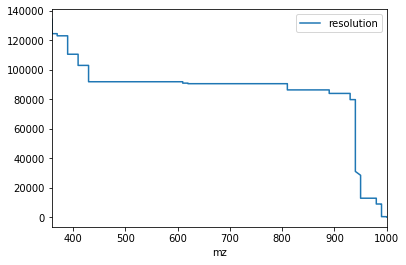

In [234]:
absolute_tolerences.plot(x='mz',y='resolution')

In [78]:
guess_selection_window (spectra_df)

0.5004866646987242

In [76]:
mean_less_std = agg_data.at['mean'] - agg_data.at['std']
if mean_less_std > 0:
    res =  mean_less_std / 2
else:
    res =  agg_data.at['mean'] /2

return res


1.0009733293974483

In [38]:
def drop_fuzzy(spectra_df):
    fraction_of_average_intensity = 0.1
    spectras_sum_inty =  spectra_df.loc[spectra_df.precursor_id.isna()].groupby('scan_id')['inty'].sum()
    sum_inty_mean = spectras_sum_inty.mean()
    spectras_sum_inty = spectras_sum_inty.to_dict()

    to_drop = []
    for scan_id in spectra_df.scan_id.drop_duplicates(): # this maintains order
        if spectras_sum_inty[scan_id] < sum_inty_mean * fraction_of_average_intensity: # one order 
            to_drop.append(scan_id)
        else:
            break
    
    return spectra_df.loc[~spectra_df.scan_id.isin(to_drop)]

In [ ]:
df = spectra_dfs[0] # first file, already teim range and mass range filtered
ms1_peaks = df.loc[df.precursor_id.isna()]

In [ ]:
df.stem.iloc[0]


In [ ]:
def bin_linear_alignment(masses, options):
    # TODO assert masses are ordered
    up_to = None
    for _, mass in masses.iteritems():
        if up_to is None:
            #up_to = mass + tolerance.getTinDA(mass) this is how its done in some places, but reuslt are not identical to below
            up_to = mass + mass / options["MSresolution"].tolerance 
        if mass <= up_to:
            yield up_to
        else:
            up_to = mass + mass / options["MSresolution"].tolerance
            yield up_to


In [ ]:
def ms1_peaks_agg(ms1_peaks, options):
    ms1_peaks.sort_values("mz", inplace=True)

    # binning is done 3 times in lx1, between each fadi filter is performed, we do it at the end intead
    bins1 = list(bin_linear_alignment(ms1_peaks.mz, options))
    bins2 = list(bin_linear_alignment(ms1_peaks.groupby(bins1)["mz"].transform("mean"), options))
    bins3 = list(bin_linear_alignment(ms1_peaks.groupby(bins2)["mz"].transform("mean"),options))

    ms1_peaks['bin_mass'] = bins3 

    # merge mutiple peaks from single scan
    g = ms1_peaks.groupby(["bin_mass", "scan_id"])
    ms1_peaks["scan_cumcount"] = g.cumcount()
    ms1_peaks["merged_mass"] = g["mz"].transform("mean")
    ms1_peaks['merged_inty'] = g['inty'].transform("mean") # NOTE merge is NOT weighted average 
    

    # aggregate results
    agg_df = (
        ms1_peaks.loc[ms1_peaks.scan_cumcount == 0] # use only the first of merged masses
        .assign(
            mass_intensity=lambda x: x.mz * x.merged_inty
        )  # for the weighted average intensity
        .groupby("bin_mass")
        .agg(
            {
                "merged_mass": ["mean", "count"],
                "merged_inty": ["mean", "sum"],
                "mass_intensity": "sum",
            }
        )
        .dropna()
    )
    agg_df.columns = ["_".join(col).strip() for col in agg_df.columns.values]

    # apply fadi filters, in lx1 its done between each bin  process
    fadi_denominator = ms1_peaks.scan_id.unique().shape[0]
    mask_ff = agg_df.merged_mass_count / fadi_denominator >= options['MSfilter']
    agg_df = agg_df[mask_ff]

    # NOTE intensity threshold is do in add_Sample... but lets do it here
    MSthreshold  = options["MSthreshold"]
    mask_inty = agg_df.merged_inty_mean > MSthreshold
    agg_df = agg_df[mask_inty]

    # for reference...weigted_mass shoud not be necesary
    agg_df["weigted_mass"] = agg_df.mass_intensity_sum / agg_df.merged_inty_sum
    # lx1 intensity is wrong because it uses the total number of scans, instead of the numebr of scans with a peak
    agg_df['lx1_bad_inty'] = agg_df.merged_inty_sum / fadi_denominator

    
    agg_df.rename(columns = {'merged_mass_mean':'mz', 'merged_inty_mean':'inty'}, inplace=True)
    return agg_df

In [ ]:
spectra_dfs[0].polarity.iat[0]

In [ ]:
res = {}
for df in spectra_dfs: # first file, already teim range and mass range filtered
    ms1_peaks = df.loc[df.precursor_id.isna()]
    agg_df = ms1_peaks_agg(ms1_peaks, options)
    agg_df['stem'] = df.stem.iloc[0]
    res[df.stem.iloc[0]] = agg_df

In [ ]:
#recalibrate
def recalibrate_mzs(mzs, cals):
    # from lx2_masterscan
    # lx1 takes all that are within tolerance and then uses highest intensity
    if not cals or mzs.empty:
        return mzs
    cal_matchs = [mzs.loc[mzs.sub(cal).abs().idxmin()] for cal in cals]
    
    cal_vals = [cal - cal_match for cal, cal_match in zip(cals, cal_matchs)]
    # prefilter
    if not any((v < 0.1 for v in cal_vals)):
        return mzs
    # find near tolerance
    cutoff = mzs.diff(-1).quantile(0.1)
    is_near = [v < cutoff for v in cal_vals]
    if not any(is_near):
        log.info("no valid calibration masses found")
        return mzs

    cal_matchs = [e for e, v in zip(cal_matchs, is_near) if v]
    cal_vals = [e for e, v in zip(cal_vals, is_near) if v]
    log.debug("recalibration info: {'\n'.join(zip(cal_matchs,cal_vals ))}")

    return mzs + np.interp(mzs, cal_matchs, cal_vals)

In [ ]:
#align ms1 
ms1_agg_peaks = pd.concat(res.values())

In [ ]:
ms1_agg_peaks

In [ ]:
# this one uses delta res for clustering
def bin_mkSurveyLinear(masses, options):
    # TODO assert masses are ordered
    minmass = masses.iloc[0]
    up_to = None
    for _, mass in masses.iteritems():
        if up_to is None:
            #up_to = mass + tolerance.getTinDA(mass) this is how its done in some places, but reuslt are not identical to below
            deltatol = options["MSresolution"].tolerance + (mass - minmass) * options['MSresolutionDelta']
            up_to = mass + (mass / deltatol)
        if mass <= up_to:
            yield up_to
        else:
            deltatol = options["MSresolution"].tolerance + (mass - minmass) * options['MSresolutionDelta']
            up_to = mass + (mass / deltatol)
            yield up_to

In [ ]:
# make the method here

In [ ]:
ms1_agg_peaks.sort_values('mz', inplace=True)

In [ ]:
# binning is done 3 times in lx1, between each fadi filter is performed, we do it at the end intead
bins1 = list(bin_mkSurveyLinear(ms1_agg_peaks.mz, options))
bins2 = list(bin_mkSurveyLinear(ms1_agg_peaks.groupby(bins1)["mz"].transform("mean"), options))
bins3 = list(bin_mkSurveyLinear(ms1_agg_peaks.groupby(bins2)["mz"].transform("mean"),options))

In [ ]:
ms1_agg_peaks['bins'] = bins3

In [ ]:
# check occupation spectracontainer.py masterscan.chekoccupation
# occupation is the % of peak intensities abvove "thrsld: "
threshold_denominator = ms1_agg_peaks.stem.unique().shape[0] # same as len(res)
threshold = options["MSminOccupation"]
bin_peak_count = ms1_agg_peaks.groupby('bins')['inty'].transform('count')
tf_mask = (bin_peak_count / threshold_denominator) >= threshold
ms1_agg_peaks['above_threshold'] = tf_mask

In [ ]:
ms1_agg_peaks['mass'] = ms1_agg_peaks.groupby('bins')['mz'].transform('mean')

In [ ]:
ms1_agg_peaks

In [ ]:
ms1_agg_peaks.pivot(index='mass', columns='stem', values=['inty','lx1_bad_inty'])

In [ ]:
# TODO collape_join_adjecent_clusters


# MS2 
----

In [ ]:
options["MSMSresolution"]
options["selectionWindow"]

#tolerance = TypeTolerance("Da", scan.options["selectionWindow"])
#window = scan.options["selectionWindow"] / 2

In [ ]:
df = spectra_dfs[1] # first file, already teim range and mass range filtered
ms2_peaks = pd.concat((df.loc[~df.precursor_id.isna()] for df in spectra_dfs))

ms2_peaks[ms2_peaks.scan_id == 'controllerType=0 controllerNumber=1 scan=41']  
*** NOTE masses are not exactly the same as in lx1, they are wrong base om raw ***  
see xcel file on desktop  

*** lx1 does the precursor binning all files, at the same time, it is not like with the ms1s ***

In [ ]:
def bin_linear_alignment_for_ms2(masses, telerance_da):
    # TODO assert masses are ordered
    up_to = None
    for _, mass in masses.iteritems():
        if up_to is None:
            #up_to = mass + tolerance.getTinDA(mass) this is how its done in some places, but reuslt are not identical to below
            up_to = mass + telerance_da
        if mass <= up_to:
            yield up_to
        else:
            up_to = mass + telerance_da
            yield up_to
    

In [ ]:
def grouped_precursors_df(ms2_peaks):
    ms2_peaks.sort_values(['precursor_mz','mz'], inplace=True)
    precursors_df = ms2_peaks[["stem", 'scan_id', 'precursor_mz']].drop_duplicates()# similar to unqie but return a series instead of an array
    # using "stem", 'scan_id' to replicate the numebr of instances for the averaging later
    
    bins1 = list(bin_linear_alignment_for_ms2(precursors_df.precursor_mz, options["selectionWindow"]))
    bins2 = list(bin_linear_alignment_for_ms2(precursors_df.groupby(bins1)['precursor_mz'].transform('mean'), options["selectionWindow"]))
    bins3 = list(bin_linear_alignment_for_ms2(precursors_df.groupby(bins2)['precursor_mz'].transform('mean'), options["selectionWindow"]))

    precursors_df['prec_bin'] = bins3

# no fadi filter for precursors  
# after groupinbg the precursors, the groups are split on the "sample" ie the file,  
# the each split of the group is merged in the __def mergeListsMsms__ method that uses linear alignment  
# thats why... prec_ms2_peaks = ms2_peaks[(ms2_peaks.precursor_mz == t) & (ms2_peaks.stem == '190321_Serum_Lipidextract_368723_01')]
    return precursors_df

In [ ]:
precursors_df = grouped_precursors_df(ms2_peaks)
precursors_bins = precursors_df.set_index('precursor_mz')['prec_bin'].to_dict()

In [ ]:
precursors_bins

in def linearAlignment the var clusterToMerge, it only takes the "sample" if its not in the cluster, so no duplicate, and only the first "sample"

for clutering ms2 precursors, it does the binning with linearAlignment... see above, its not the unique precusrsor, its each precursor in each file,  but it does the binning on both at the same time, in contrast to how its done for ms1 binning, where first the binning is done for one file and then for the other.

then it does the merge it on a per file (AKA "sample")  basis, merge means doing a linera alignmebt on all the peaks in the bin per sample


In [ ]:
ms2_peaks['prec_bin'] = ms2_peaks.precursor_mz.map(precursors_bins)


In [ ]:
# this one uses delta res for clustering
def bin_mkSurveyLinear_for_ms2(masses, options): # copied from above
    # TODO assert masses are ordered
    minmass = masses.iloc[0]
    up_to = None
    for _, mass in masses.iteritems():
        if up_to is None:
            #up_to = mass + tolerance.getTinDA(mass) this is how its done in some places, but reuslt are not identical to below
            deltatol = options["MSMSresolution"].tolerance + (mass - minmass) * options['MSMSresolutionDelta']
            up_to = mass + (mass / deltatol)
        if mass <= up_to:
            yield up_to
        else:
            deltatol = options["MSMSresolution"].tolerance + (mass - minmass) * options['MSMSresolutionDelta']
            up_to = mass + (mass / deltatol)
            yield up_to

In [ ]:
def ms2_peaks_group_generator(grouped_prec, options):

    for idx, prec_ms2_peaks in  grouped_prec:
        #intensityWeightedAvg
        prec_ms2_peaks.sort_values('mz', inplace=True)
        bins1 = list(bin_mkSurveyLinear_for_ms2(prec_ms2_peaks.mz, options))
        bins1_weighted_average = (prec_ms2_peaks.mz * prec_ms2_peaks.inty).groupby(bins1).transform('sum') / prec_ms2_peaks.inty.groupby(bins1).transform('sum')
        bins2 = list(bin_mkSurveyLinear_for_ms2(bins1_weighted_average, options))
        bins2_weighted_average = (prec_ms2_peaks.mz * prec_ms2_peaks.inty).groupby(bins2).transform('sum') / prec_ms2_peaks.inty.groupby(bins2).transform('sum')
        bins3 = list(bin_mkSurveyLinear_for_ms2(bins2_weighted_average, options))
        weighted_mass = (prec_ms2_peaks.mz * prec_ms2_peaks.inty).groupby(bins3).transform('sum') / prec_ms2_peaks.inty.groupby(bins3).transform('sum')

        prec_ms2_peaks['bins'] = bins3
        prec_ms2_peaks['weighted_mass'] = weighted_mass

        fadi_denominator = prec_ms2_peaks.scan_id.unique().shape[0]
        ff_mask = prec_ms2_peaks.groupby("bins")['bins'].transform('count') / fadi_denominator>= options['MSMSfilter']
        mof_mask = prec_ms2_peaks.groupby("bins")['bins'].transform('count') / fadi_denominator>= options['MSMSminOccupation']

        tf_mask = prec_ms2_peaks.inty > options["MSMSthreshold"]
        
        # it uses merge sum intensity for getting the averrage intensity...
        agg_prec_ms2_peaks = prec_ms2_peaks[ff_mask & tf_mask & mof_mask].groupby('bins').agg({"weighted_mass":['mean', 'count'],"inty":"mean"})
        agg_prec_ms2_peaks['precursor_mz'] = prec_ms2_peaks.precursor_mz.mean().round(6) 
        # there is minor differrence in mean between different files, and the same precursor bin, to avoid it we round
        
        agg_prec_ms2_peaks['stem'] = idx[0]

        agg_prec_ms2_peaks.columns = ["_".join(col).strip() for col in agg_prec_ms2_peaks.columns.values]
        names = {'weighted_mass_mean':'mz',
         'weighted_mass_count':'count', 
         "inty_mean":'inty',
         'precursor_mz_':'precursor_mz',
         'stem_':'stem'}
        agg_prec_ms2_peaks.rename(columns = names, inplace=True)

        yield agg_prec_ms2_peaks



In [ ]:
ms2_peaks.prec_bin.unique().size

In [ ]:
grouped_prec = ms2_peaks.groupby(['stem','prec_bin'])
ms2_agg_peaks = pd.concat(ms2_peaks_group_generator(grouped_prec, options))

In [ ]:
# collape_join_adjecent_clusters_msms(cluster)

In [ ]:
# associate ms2 to ms1 scans... 
ms1_masses = ms1_agg_peaks.mass.drop_duplicates()
precur_masses = ms2_agg_peaks.precursor_mz.drop_duplicates()
tol = options["selectionWindow"] / 2
tmp = pd.merge_asof(ms1_masses, precur_masses.astype(ms1_masses.dtype), left_on='mass', right_on='precursor_mz', direction ='nearest' , tolerance=tol)

In [ ]:
ms1_agg_peaks

# build the masterscan

In [37]:
from lx.spectraContainer import MasterScan
from LX2_masterscan import se_factory, ms2entry_factory

[12:27:33] {comtypes.client._code_cache:95} INFO - Imported existing <module 'comtypes.gen' from 'c:\\Users\\mirandaa\\Anaconda3\\envs\\lx128_p3_Dev\\lib\\site-packages\\comtypes\\gen\\__init__.py'>
[12:27:33] {comtypes.client._code_cache:72} INFO - Using writeable comtypes cache directory: 'c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\comtypes\gen'


In [ ]:
def mass_inty_generator_ms1_agg(ms1_agg_peaks):
    for mass, gdf in ms1_agg_peaks.groupby('mass'):
        dictIntensity = gdf.set_index('stem')['lx1_bad_inty'].to_dict()
        dictIntensity_lx2 = gdf.set_index('stem')['inty'].to_dict()
        dictIntensity.update({ f'{k}_lx2':v for k,v in dictIntensity_lx2.items()})
        yield (mass, dictIntensity, 1)

In [ ]:
samples = samples[:2]

In [ ]:
samples.extend([f'{k}_lx2' for k in samples]) #because we add both results

In [ ]:
samples

In [ ]:
listSurveyEntry = [
        se_factory(msmass, dictIntensity, samples, polarity)
        for msmass, dictIntensity, polarity in mass_inty_generator_ms1_agg(
            ms1_agg_peaks
        )
    ]

In [ ]:
def MSMSEntry_list_generator(gdf):
    for mz,  precur_df in gdf.groupby('mz'):
        dictIntensity = precur_df.set_index('stem')['inty'].to_dict()
        dictIntensity.update({ f'{k}_lx2':v for k,v in dictIntensity.items()}) #TODO actually get other values
        yield (mz, dictIntensity, samples, 1)

In [ ]:
def MS2_dict_generator(ms2_agg_peaks):
    for precursor_mz, gdf in ms2_agg_peaks.groupby('precursor_mz'):
        MSMSEntry_list = [ms2entry_factory(*args) for args in MSMSEntry_list_generator(gdf)]
        yield (precursor_mz, MSMSEntry_list)

In [ ]:
MS2_dict = dict(MS2_dict_generator(ms2_agg_peaks))

In [ ]:
MS2_dict_keys =pd.Series(list(MS2_dict.keys()), name = 'MS2_precurs')

In [ ]:
MS2_dict_keys.sort_values(inplace=True)

In [ ]:
MS1_precurmass =pd.Series([se.precurmass for se in listSurveyEntry], name = 'MS1_precurmass')

In [ ]:
MS1_precurmass.sort_values(inplace=True)

In [ ]:
# associate ms2 to ms1 scans
tol = options["selectionWindow"] / 2
precur_map_df = pd.merge_asof(MS1_precurmass, MS2_dict_keys, left_on='MS1_precurmass' , right_on='MS2_precurs',direction ='nearest' , tolerance=tol)
# tmp = pd.merge_asof(ms1_masses, ms1_masses.dtype, left_on='mass', right_on='precursor_mz', direction ='nearest' , tolerance=tol)

In [ ]:
precur_dict = precur_map_df.set_index(MS1_precurmass)['MS2_precurs'].to_dict()

In [ ]:
len(precur_dict)

In [ ]:
# ms1_prec_dict = ms1_agg_peaks.set_index('mass')['precursor_mz'].to_dict()
for se in listSurveyEntry:
    precursor = precur_dict[se.precurmass]
    print(len(MS2_dict.get(precursor,[])))
    

In [36]:

# add data to masterscan
scan = MasterScan(options)
scan.listSurveyEntry = listSurveyEntry
scan.listSurveyEntry[0].massWindow = 0.01  # to avoid bug
scan.sampleOccThr["MS"] = [(0.0, [])]  # to avoid bug at def checkOccupation
scan.sampleOccThr["MSMS"] = [(0.0, [])]

# for printing we need
# samples.extend([f'{k}_lx2' for k in samples])
scan.listSamples = samples


NameError: name 'MasterScan' is not defined

In [ ]:
import pickle
with open('tmp_lx1_and_lx2.sc','wb') as f: pickle.dump(scan, f)

# recalibrate
import pickle

In [ ]:
import pickle
with open('ms1_dfs.pkl', 'rb') as f: ms1_dfs = pickle.load(f)
with open('options.pkl', 'rb') as f: options = pickle.load(f)

In [ ]:
#recalibrate
def recalibrate_mzs(mzs, cals):
    # from lx2_masterscan
    # lx1 takes all that are within tolerance and then uses highest intensity
    if not cals or mzs.empty:
        return mzs
    cal_matchs = [mzs.loc[mzs.sub(cal).abs().idxmin()] for cal in cals]

    cal_vals = [cal - cal_match for cal, cal_match in zip(cals, cal_matchs)]
    # prefilter
    if not any((v < 0.1 for v in cal_vals)):
        return mzs
    # find near tolerance
    cutoff = mzs.diff(-1).quantile(0.1)
    is_near = [v < cutoff for v in cal_vals]
    if not any(is_near):
        log.info("no valid calibration masses found")
        return mzs

    cal_matchs = [e for e, v in zip(cal_matchs, is_near) if v]
    cal_vals = [e for e, v in zip(cal_vals, is_near) if v]
    log.debug("recalibration info: {'\n'.join(zip(cal_matchs,cal_vals ))}")

    return mzs + np.interp(mzs, cal_matchs, cal_vals)

In [ ]:
res = []
for cal_mass in options['MScalibration']:
    tol = cal_mass / options["MSresolution"].tolerance
    #find close enough most intense
    reference_mass = ms1_df[ms1_df.mz.between(cal_mass-tol , cal_mass+tol)].sort_values('inty', ascending=False).mz.iat[0]
    change_val = cal_mass - reference_mass
    res.append((reference_mass, change_val))

cal_matchs, cal_vals = zip(*res)

# perf testing

In [2]:
import pickle

In [24]:
# with open('stitched.sc','wb') as f: pickle.dump(stitched, 

In [3]:
with open('stitched.sc','rb') as f: stitched  = pickle.load(f) 

In [4]:
stitched.dump('stitched-dump.csv')

Dumping Master Scan content
containing:
8488 MS entries and
0 MS/MS entries.


True

In [34]:
t = stitched.listSurveyEntry[0]
t.dictIntensity

{'Extraction_Blank_1_Ult-s': 339.1315002441406,
 'Extraction_Blank_2_Ult-s': 0,
 'Ultimate_1-s': 0,
 'Ultimate_2-s': 339.1653137207031,
 'Ult_05NIST_1-s': 274.6545104980469,
 'Ult_05NIST_2-s': 267.81512451171875,
 'Ult_10NIST_1-s': 0,
 'Ult_10NIST_2-s': 0,
 'Ult_1NIST_1-s': 261.4827575683594,
 'Ult_1NIST_2-s': 318.67169189453125,
 'Ult_5NIST_1-s': 0,
 'Ult_5NIST_2-s': 282.861083984375,
 'Extraction_Blank_1_Ult-s_lx2': 339.1315002441406,
 'Extraction_Blank_2_Ult-s_lx2': 0,
 'Ultimate_1-s_lx2': 0,
 'Ultimate_2-s_lx2': 339.1653137207031,
 'Ult_05NIST_1-s_lx2': 274.6545104980469,
 'Ult_05NIST_2-s_lx2': 267.81512451171875,
 'Ult_10NIST_1-s_lx2': 0,
 'Ult_10NIST_2-s_lx2': 0,
 'Ult_1NIST_1-s_lx2': 261.4827575683594,
 'Ult_1NIST_2-s_lx2': 318.67169189453125,
 'Ult_5NIST_1-s_lx2': 0,
 'Ult_5NIST_2-s_lx2': 282.861083984375}

In [7]:
import pickle
with open('ms2_peaks.pkl','rb') as f: ms2_peaks = pickle.load(f)

In [15]:
ms2_peaks[['precursor_mz', 'prec_bin']].drop_duplicates()['prec_bin'].value_counts()

449.699011    1
952.201025    1
623.873022    1
771.019995    1
723.972998    1
             ..
432.682013    1
414.664008    1
811.059973    1
436.686011    1
549.798987    1
Name: prec_bin, Length: 640, dtype: int64

In [16]:
import pandas as pd
